In [16]:
import kagglehub
dataset_path = kagglehub.dataset_download('sgpjesus/bank-account-fraud-dataset-neurips-2022')

print('Data source import complete.',dataset_path)


Data source import complete. /root/.cache/kagglehub/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022/versions/2


In [17]:
# Data manipulation libraries
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

# Data preprocessing and analysis libraries
import scipy.stats as stats
from scipy.stats import norm, skew

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [18]:
dataset_path

'/root/.cache/kagglehub/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022/versions/2'

In [19]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022/versions/2/Base.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [21]:
df.head(5).T

,0,1,2,3,4
fraud_bool,0,0,0,0,0
income,0.3,0.8,0.8,0.6,0.9
name_email_similarity,0.986506,0.617426,0.996707,0.4751,0.842307
prev_address_months_count,-1,-1,9,11,-1
current_address_months_count,25,89,14,14,29
customer_age,40,20,40,30,40
days_since_request,0.006735,0.010095,0.012316,0.006991,5.742626
intended_balcon_amount,102.453711,-0.849551,-1.490386,-1.863101,47.152498
payment_type,AA,AD,AB,AB,AA
zip_count_4w,1059,1658,1095,3483,2339


In [22]:
df.isnull().sum()

,0
fraud_bool,0
income,0
name_email_similarity,0
prev_address_months_count,0
current_address_months_count,0
customer_age,0
days_since_request,0
intended_balcon_amount,0
payment_type,0
zip_count_4w,0


In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df['fraud_bool'].value_counts() #Data imbalance

,fraud_bool
0,988971
1,11029


In [25]:
object_columns = df.select_dtypes(include=['object']).columns

df = pd.get_dummies(df, columns=object_columns, drop_first=True)


In [26]:
df.head(5).T

,0,1,2,3,4
fraud_bool,0.000000,0.000000,0.000000,0.000000,0.000000
income,0.300000,0.800000,0.800000,0.600000,0.900000
name_email_similarity,0.986506,0.617426,0.996707,0.475100,0.842307
prev_address_months_count,-1.000000,-1.000000,9.000000,11.000000,-1.000000
current_address_months_count,25.000000,89.000000,14.000000,14.000000,29.000000
customer_age,40.000000,20.000000,40.000000,30.000000,40.000000
days_since_request,0.006735,0.010095,0.012316,0.006991,5.742626
intended_balcon_amount,102.453711,-0.849551,-1.490386,-1.863101,47.152498
zip_count_4w,1059.000000,1658.000000,1095.000000,3483.000000,2339.000000
velocity_6h,13096.035018,9223.283431,4471.472149,14431.993621,7601.511579


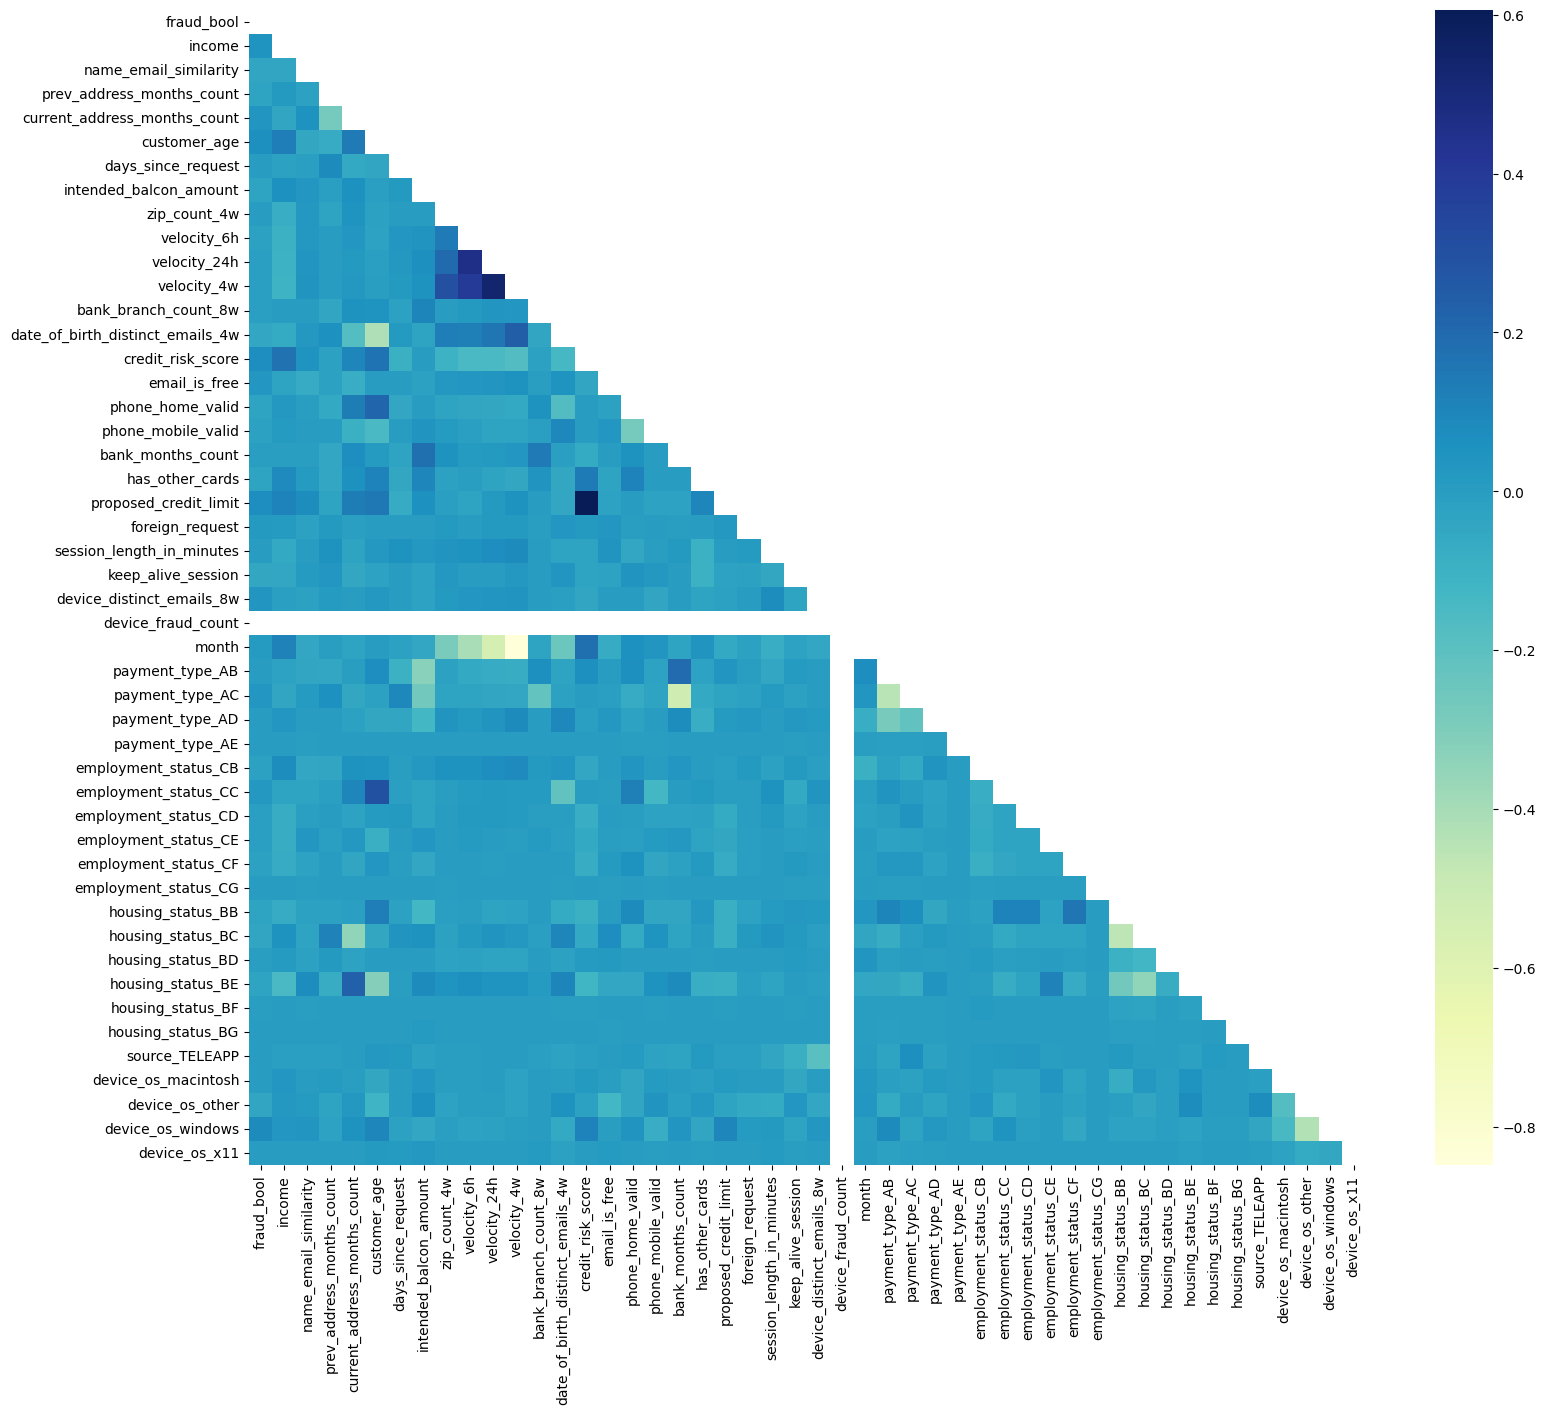

In [27]:
plt.figure(figsize=(18, 15))
cor = df.corr()
mask = np.triu(np.ones_like(cor))
heatmap = sns.heatmap(cor, mask=mask, annot=True, cmap=plt.cm.YlGnBu, annot_kws={"fontsize": 6}, fmt=".2f")  # Set fmt to ".2f" to display 2 decimals

# Save the heatmap plot
plt.savefig('public/correlation_heatmap.png', format='png')

plt.show()

In [28]:
#hence no column is very highly correlated for us to drop

In [29]:
corr =df.corr().round(1)

# Find features with strong correlation with target
target_corr = corr['fraud_bool'].abs().sort_values(ascending=False)
strong_corr_features = target_corr.index[1:11]

print('Top 10 features with highest correlation with target:')
for feature in strong_corr_features:
    print(f"{feature}: {target_corr[feature]}")

Top 10 features with highest correlation with target:
customer_age: 0.1
device_os_windows: 0.1
proposed_credit_limit: 0.1
credit_risk_score: 0.1
keep_alive_session: 0.1
days_since_request: 0.0
payment_type_AC: 0.0
payment_type_AE: 0.0
employment_status_CB: 0.0
employment_status_CC: 0.0


In [30]:
# Define the income thresholds
low_threshold = 0.3
high_threshold = 0.6

def categorize_income(income):
    if income <= low_threshold:
        return 1
    elif low_threshold < income <= high_threshold:
        return 2
    else:
        return 3
df['income_group'] = df['income'].apply(categorize_income)
df['income_group'] = df['income_group'].astype('int64')
column_to_move = df.pop('income_group')
df.insert(1, 'income_group', column_to_move)
df = df.drop(columns=['income'])
df.head(10)

,fraud_bool,income_group,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,1,0.986506,-1,25,40,0.006735,102.453711,1059,13096.035018,...,1,0,0,0,0,0,0,0,0,0
1,0,3,0.617426,-1,89,20,0.010095,-0.849551,1658,9223.283431,...,1,0,0,0,0,0,0,1,0,0
2,0,3,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,...,1,0,0,0,0,0,0,0,1,0
3,0,3,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,...,1,0,0,0,0,0,0,0,0,0
4,0,3,0.842307,-1,29,40,5.742626,47.152498,2339,7601.511579,...,1,0,0,0,0,0,0,1,0,0
5,0,3,0.294840,-1,369,30,0.024232,-1.232556,1204,11556.955514,...,0,0,1,0,0,0,0,0,0,0
6,0,1,0.773085,22,4,40,0.006919,-0.544676,1998,11723.993606,...,1,0,0,0,0,0,0,0,0,1
7,0,3,0.153880,-1,103,40,0.045122,-1.101184,1548,4999.555801,...,0,0,1,0,0,0,0,1,0,0
8,0,1,0.523655,21,2,30,0.035206,-0.955737,1781,6979.994002,...,1,0,0,0,0,0,0,1,0,0
9,0,3,0.834475,-1,134,20,0.017245,-1.356393,3113,7549.992086,...,0,1,0,0,0,0,0,1,0,0


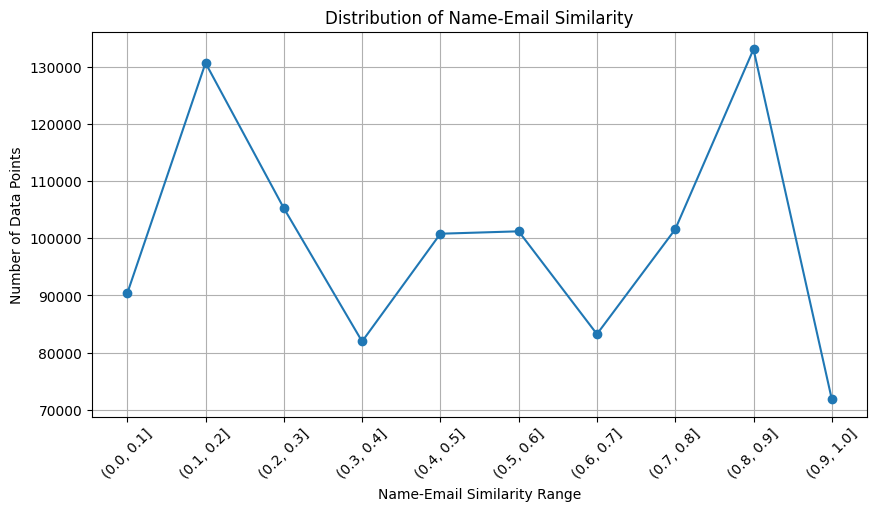

In [31]:
# Define the bin ranges
bin_ranges = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
df['similarity_range'] = pd.cut(df['name_email_similarity'], bins=bin_ranges)
range_counts = df['similarity_range'].value_counts().sort_index()
bin_labels = [str(bin_range) for bin_range in range_counts.index]

plt.figure(figsize=(10, 5))
plt.plot(bin_labels, range_counts, marker='o', linestyle='-')
plt.xlabel('Name-Email Similarity Range')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Name-Email Similarity')
plt.xticks(rotation=45)
plt.grid(True)

# Save the plot
plt.savefig('public/name_email_similarity_distribution.png', format='png')

plt.show()

In [32]:
df['name_email_similarity'] = df['name_email_similarity'].apply(lambda x: round(x, 3))

In [33]:
df.drop(columns=['similarity_range'],inplace=True)

In [34]:
min_value = df['name_email_similarity'].min()
max_value = df['name_email_similarity'].max()
print(f"Range of 'name_email_similarity': {min_value} to {max_value}")

Range of 'name_email_similarity': 0.0 to 1.0


In [35]:
low_threshold = 0.333
high_threshold = 0.667

def categorize_similarity(similarity):
    if similarity <= low_threshold:
        return 1
    elif low_threshold < similarity <= high_threshold:
        return 2
    else:
        return 3

df['name_email_similarity_group'] = df['name_email_similarity'].apply(categorize_similarity)
df['name_email_similarity_group'] = df['name_email_similarity_group'].astype('int64')
column_to_move = df.pop('name_email_similarity_group')
df.insert(2, 'name_email_similarity_group', column_to_move)
df = df.drop(columns=['name_email_similarity'])
df.head(10)

,fraud_bool,income_group,name_email_similarity_group,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,1,3,-1,25,40,0.006735,102.453711,1059,13096.035018,...,1,0,0,0,0,0,0,0,0,0
1,0,3,2,-1,89,20,0.010095,-0.849551,1658,9223.283431,...,1,0,0,0,0,0,0,1,0,0
2,0,3,3,9,14,40,0.012316,-1.490386,1095,4471.472149,...,1,0,0,0,0,0,0,0,1,0
3,0,3,2,11,14,30,0.006991,-1.863101,3483,14431.993621,...,1,0,0,0,0,0,0,0,0,0
4,0,3,3,-1,29,40,5.742626,47.152498,2339,7601.511579,...,1,0,0,0,0,0,0,1,0,0
5,0,3,1,-1,369,30,0.024232,-1.232556,1204,11556.955514,...,0,0,1,0,0,0,0,0,0,0
6,0,1,3,22,4,40,0.006919,-0.544676,1998,11723.993606,...,1,0,0,0,0,0,0,0,0,1
7,0,3,1,-1,103,40,0.045122,-1.101184,1548,4999.555801,...,0,0,1,0,0,0,0,1,0,0
8,0,1,2,21,2,30,0.035206,-0.955737,1781,6979.994002,...,1,0,0,0,0,0,0,1,0,0
9,0,3,3,-1,134,20,0.017245,-1.356393,3113,7549.992086,...,0,1,0,0,0,0,0,1,0,0


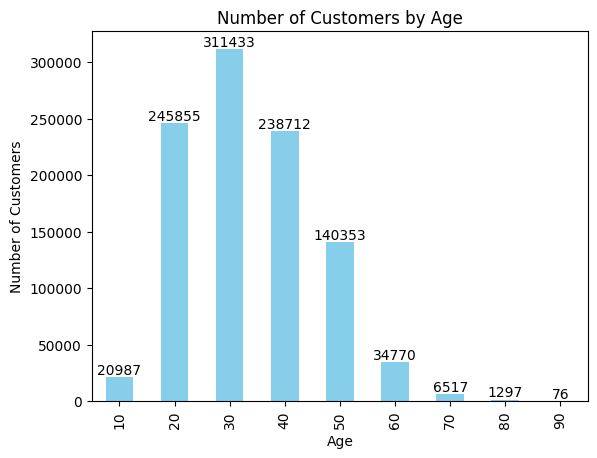

In [36]:
age_counts = df['customer_age'].value_counts().sort_index()

ax = age_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Age')

for i, v in enumerate(age_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Save the plot
plt.savefig('public/number_of_customers_by_age.png', format='png')

plt.show()

In [37]:
num_bins = 5
column_to_partition = 'credit_risk_score'
min_credit_score = df[column_to_partition].min()-1

bin_width = (df[column_to_partition].max() - min_credit_score) / num_bins
bin_edges = [min_credit_score + i * bin_width for i in range(num_bins + 1)]
bin_labels = [i for i in range(1, num_bins + 1)]
df['credit_risk_score'] = pd.cut(df[column_to_partition], bins=bin_edges, labels=bin_labels)
df['credit_risk_score'] = df['credit_risk_score'].astype('int64')

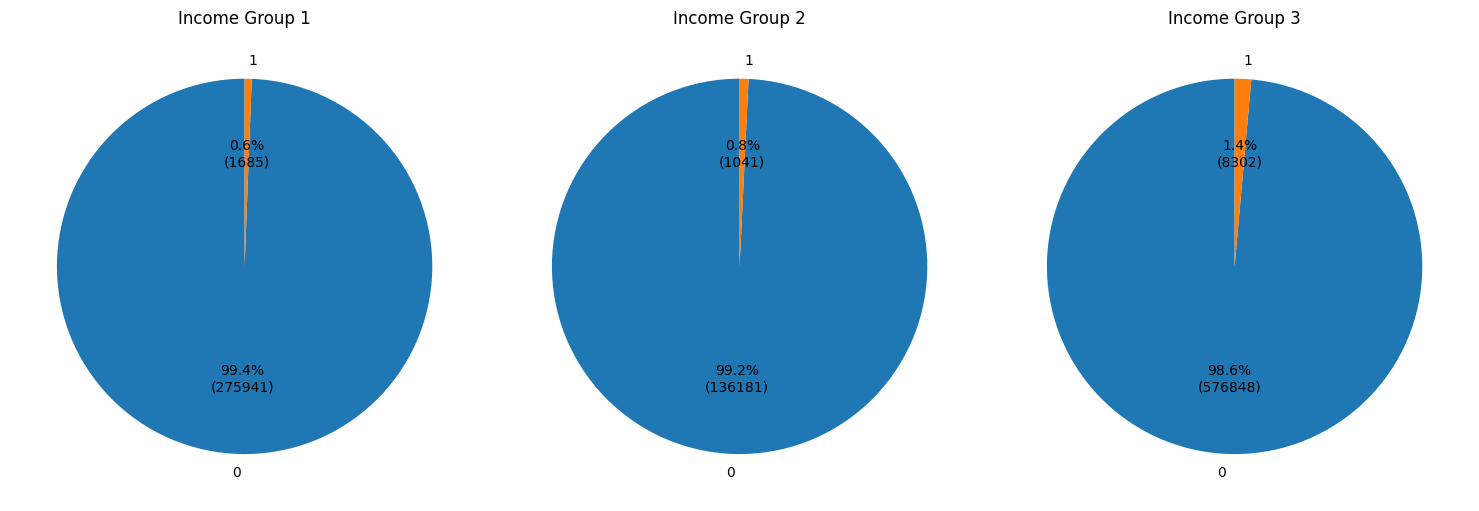

In [38]:
counts = df.groupby(['income_group', 'fraud_bool']).size().unstack()

# Plotting three pie charts for each income group
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for idx, group in enumerate(counts.index):
    ax = axs[idx]
    values = counts.loc[group]
    ax.pie(values, labels=values.index, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(values) / 100)})', startangle=90)
    ax.set_title(f'Income Group {group}')

# Save the plot
plt.tight_layout()
plt.savefig('public/income_group_fraud_distribution.png', format='png')

plt.show()

In [39]:
df.columns

Index(['fraud_bool', 'income_group', 'name_email_similarity_group',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
       'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
       'credit_risk_score', 'email_is_free', 'phone_home_valid',
       'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
       'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes',
       'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count',
       'month', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD',
       'payment_type_AE', 'employment_status_CB', 'employment_status_CC',
       'employment_status_CD', 'employment_status_CE', 'employment_status_CF',
       'employment_status_CG', 'housing_status_BB', 'housing_status_BC',
       'housing_status_BD', 'housing_status_BE', 'housing_status

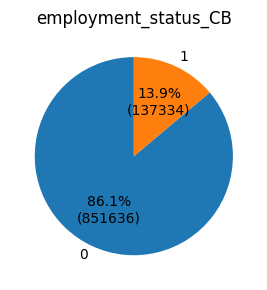

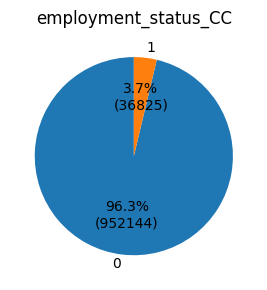

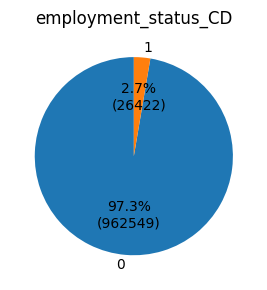

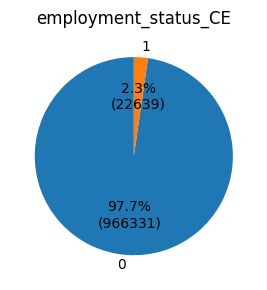

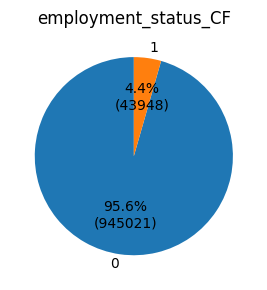

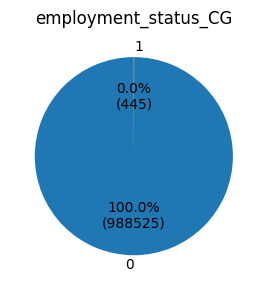

In [40]:
emp_cols = ['employment_status_CB', 'employment_status_CC',
       'employment_status_CD', 'employment_status_CE', 'employment_status_CF',
       'employment_status_CG']
chart_size = (3, 3)

for cols in emp_cols:
    # Grouping by the employment column and 'fraud_bool' to count occurrences
    counts_emp = df.groupby([cols, 'fraud_bool']).size().unstack()

    # Set the figure size
    plt.figure(figsize=chart_size)

    # Plotting a pie chart for each employment column
    plt.pie(counts_emp.T.values[0], labels=counts_emp.index, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(counts_emp.T.values[0]) / 100)})', startangle=90)
    plt.title(cols)

    # Save the plot
    plt.tight_layout()
    plt.savefig(f'public/{cols}_fraud_distribution.png', format='png')

    plt.show()

In [41]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # Set 'fraud_bool' as the target variable by moving it to the first column
    target_col = df_copy.pop('fraud_bool')
    df_copy.insert(0, 'fraud_bool', target_col)
    return df_copy

def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:, 1:]  # Exclude only the first column
    y_target = df_copy.iloc[:, 0]  # Use the first column as y-axis
    X_train, X_test, y_train, y_test = train_test_split(X_features,
                                                        y_target,
                                                        test_size=0.3,
                                                        random_state=0,
                                                        stratify=y_target)
    return X_train, X_test, y_train, y_test

In [42]:
X_train, X_test, y_train, y_test = get_train_test_dataset(df)

Oversampling to correct Data Imbalance

In [43]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Feature/label dataset for training before applying SMOTE: ', X_train.shape, y_train.shape)
print('Feature/label dataset for training after applying SMOTE: ', X_train_smote.shape, y_train_smote.shape)
print('Distribution of label values after applying SMOTE:\n',pd.Series(y_train_smote).value_counts())

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7edb3f0aa5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so: cannot open shared object file: No such file or directory


Feature/label dataset for training before applying SMOTE:  (700000, 47) (700000,)
Feature/label dataset for training after applying SMOTE:  (1384560, 47) (1384560,)
Distribution of label values after applying SMOTE:
 0    692280
1    692280
Name: fraud_bool, dtype: int64


In [44]:
train_df =pd.concat([X_train_smote,y_train_smote],axis=1)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

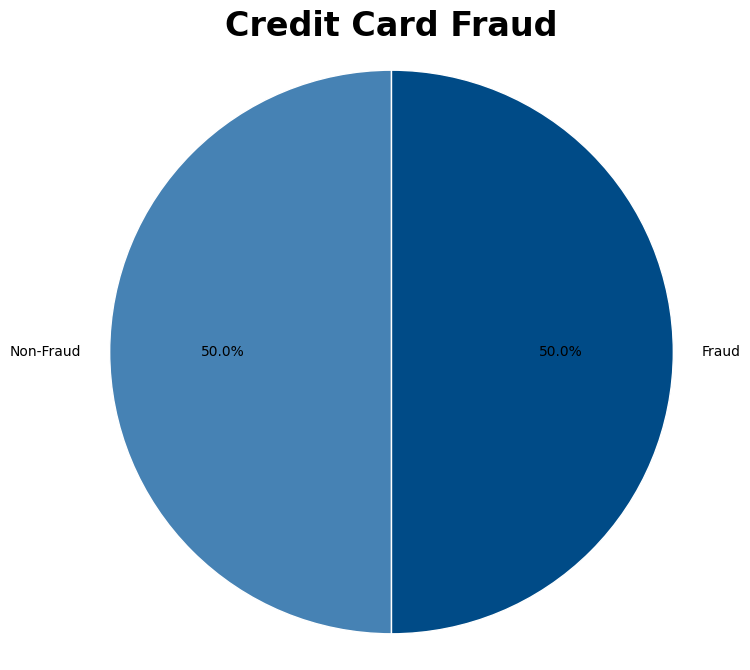

In [46]:
import matplotlib.pyplot as plt

# Data for plotting
colors = ['SteelBlue', '#004B87']
labels = ['Non-Fraud', 'Fraud']
values = train_df['fraud_bool'].value_counts() / train_df['fraud_bool'].shape[0]

# Create a pie chart with Matplotlib
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the size of the figure
ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(edgecolor='white'))

# Set title and make sure the pie chart is a circle
ax.set_title('Credit Card Fraud', fontsize=24, fontweight='bold')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the plot as an image
plt.savefig('public/credit_card_fraud_pie_chart_matplotlib.png', format='png')

# Show the plot
plt.show()

In [47]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score

In [48]:
models={

    'LogisticRegression':LogisticRegression(),
    'Randomforest':RandomForestClassifier(),
    'xgboost':XGBClassifier()
}

In [49]:
# tuned_decisiontree = tune_model(decisiontree, optimize = 'AUC')
# tuned_gradientboosting = tune_model(gbm, optimize = 'AUC')
# tuned_logisticregression = tune_model(logisticregression, optimize = 'AUC')

In [50]:


# List of dictionaries containing model performance metrics
metrics_data = [
    {'Model': 'Logistic Regression', 'Accuracy': 0.6752024833918117, 'F1 Score': 0.6773281365364622, 'Precision': 0.6729241516966068},
    {'Model': 'Random Forest', 'Accuracy': 0.9387224418671277, 'F1 Score': 0.9352339866161046, 'Precision': 0.9916896460544706},
    {'Model': 'XGBoost', 'Accuracy': 0.9803465558442959, 'F1 Score': 0.9802316869344706, 'Precision': 0.9859945505945581}
]

# Create a DataFrame from the list of dictionaries
metrics_df = pd.DataFrame(metrics_data)



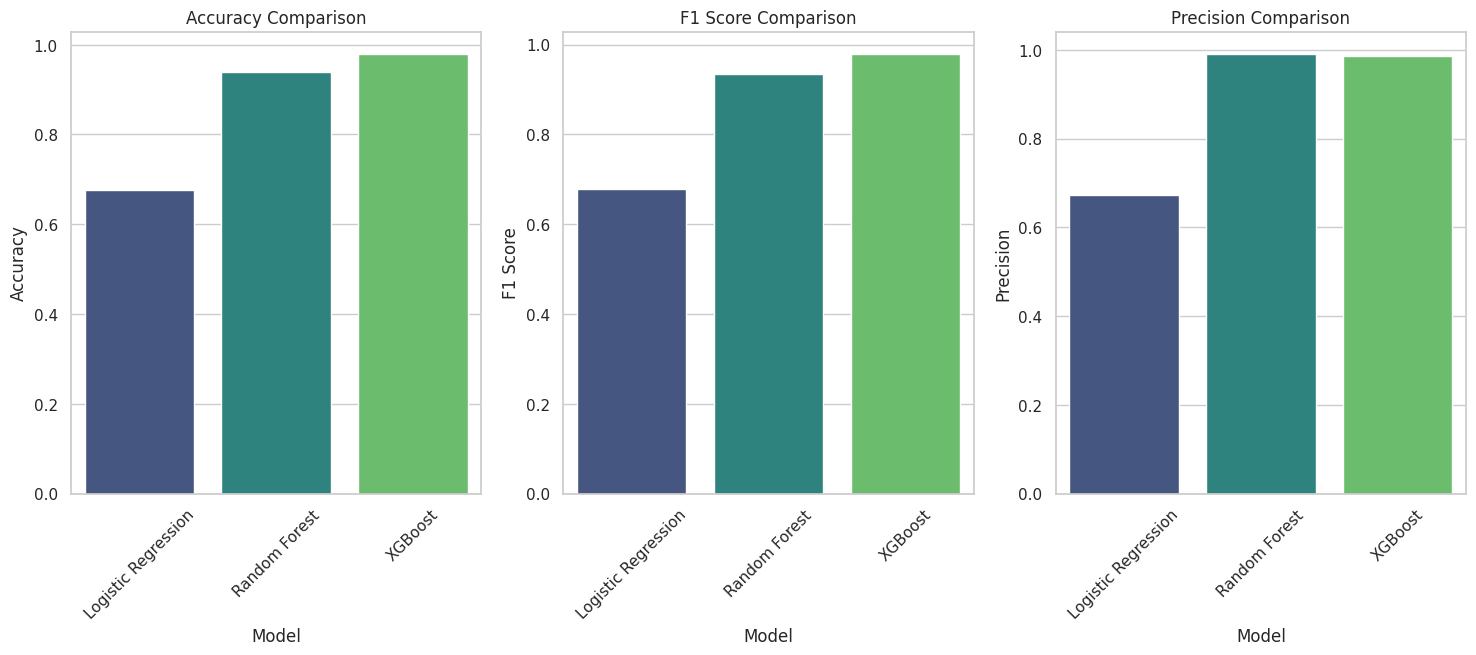

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Plot the performance metrics for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Accuracy Plot
sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=axes[0], palette='viridis')
axes[0].set_title('Accuracy Comparison')

# F1 Score Plot
sns.barplot(x='Model', y='F1 Score', data=metrics_df, ax=axes[1], palette='viridis')
axes[1].set_title('F1 Score Comparison')

# Precision Plot
sns.barplot(x='Model', y='Precision', data=metrics_df, ax=axes[2], palette='viridis')
axes[2].set_title('Precision Comparison')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Save the plot to a file
fig.savefig("public/model_performance_comparison.png")

# Display the plot
plt.show()

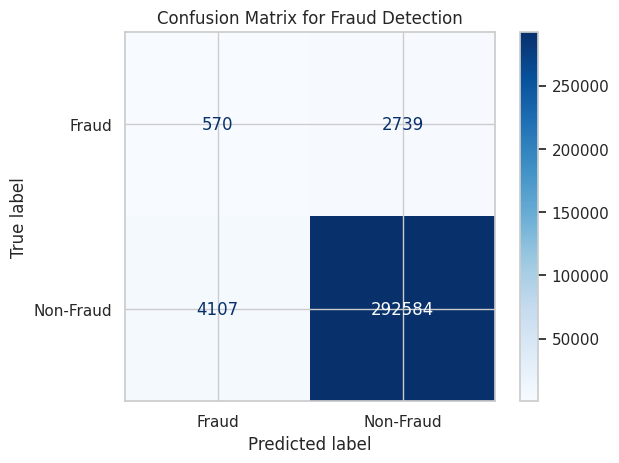

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Confusion matrix for XGBoost predictions
model = XGBClassifier()
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fraud', 'Non-Fraud'])

# Plotting the confusion matrix
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Fraud Detection')

# Save the plot
plt.savefig("public/confusion_matrix_fraud_detection.png")

# Show the plot
plt.show()

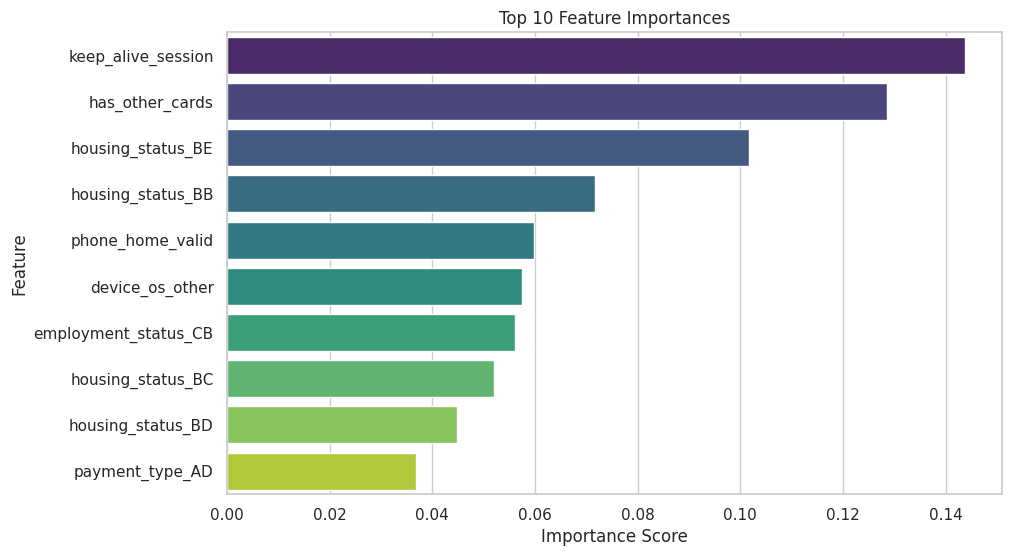

In [53]:
importances = model.feature_importances_
features = X_train_smote.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Bar plot of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

# Save the plot
plt.savefig("public/feature_importance_top10.png")

# Show the plot
plt.show()

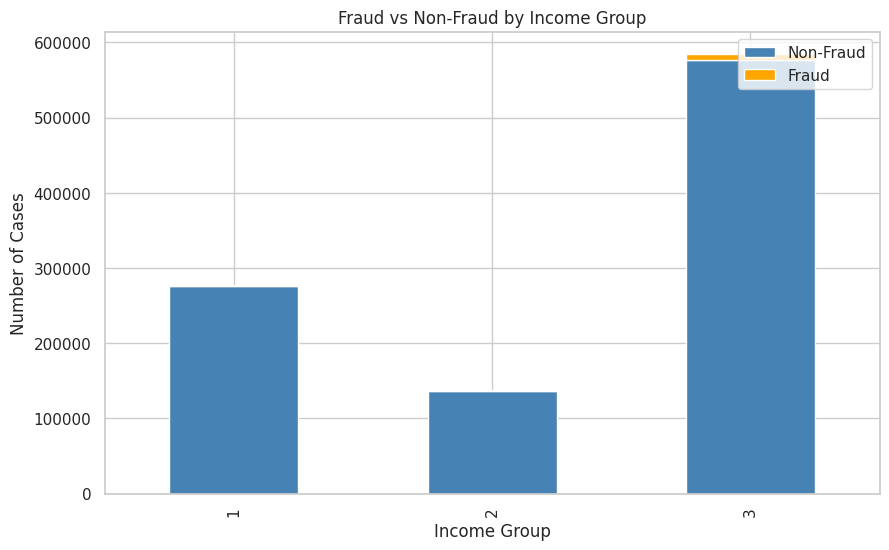

In [54]:
counts = df.groupby(['income_group', 'fraud_bool']).size().unstack()
counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['steelblue', 'orange'])
plt.title('Fraud vs Non-Fraud by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Number of Cases')
plt.legend(['Non-Fraud', 'Fraud'], loc='upper right')

# Save the plot
plt.savefig("public/fraud_vs_non_fraud_by_income_group.png")

# Show the plot
plt.show()

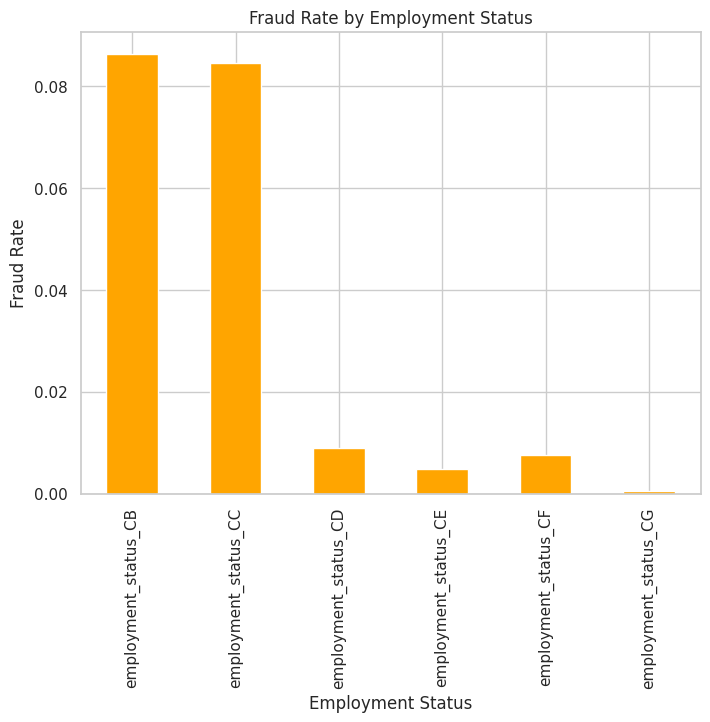

In [55]:
emp_cols = ['employment_status_CB', 'employment_status_CC', 'employment_status_CD',
            'employment_status_CE', 'employment_status_CF', 'employment_status_CG']
fraud_rates = df[df['fraud_bool'] == 1][emp_cols].mean()

plt.figure(figsize=(8, 6))
fraud_rates.plot(kind='bar', color='orange')
plt.title('Fraud Rate by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Fraud Rate')

# Save the plot
plt.savefig("public/fraud_rate_by_employment_status.png")

# Show the plot
plt.show()

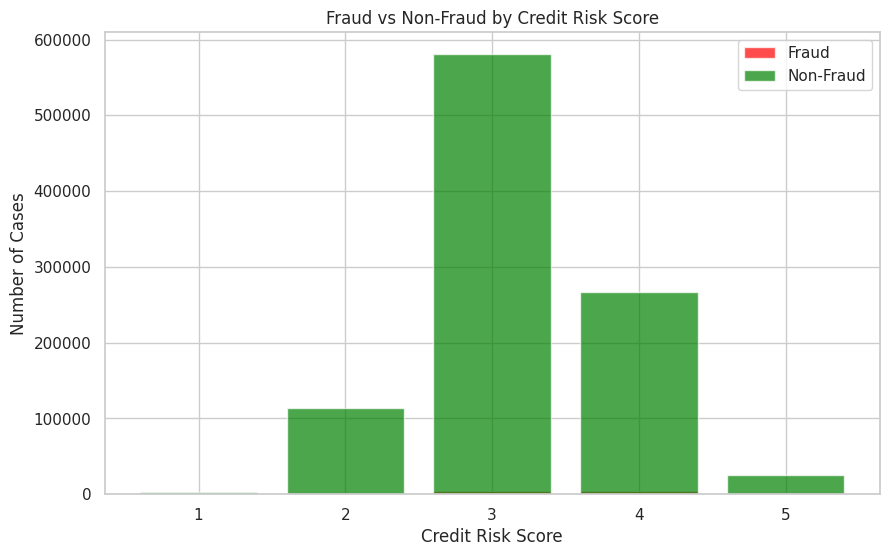

In [56]:
fraud_credit_risk = df[df['fraud_bool'] == 1]['credit_risk_score'].value_counts().sort_index()
nonfraud_credit_risk = df[df['fraud_bool'] == 0]['credit_risk_score'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(fraud_credit_risk.index, fraud_credit_risk, label='Fraud', color='red', alpha=0.7)
plt.bar(nonfraud_credit_risk.index, nonfraud_credit_risk, label='Non-Fraud', color='green', alpha=0.7)
plt.title('Fraud vs Non-Fraud by Credit Risk Score')
plt.xlabel('Credit Risk Score')
plt.ylabel('Number of Cases')
plt.legend()

# Save the plot
plt.savefig("public/fraud_vs_nonfraud_by_credit_risk_score.png")

# Show the plot
plt.show()

Confusion Matrix for LogisticRegression:
Model LogisticRegression saved successfully.


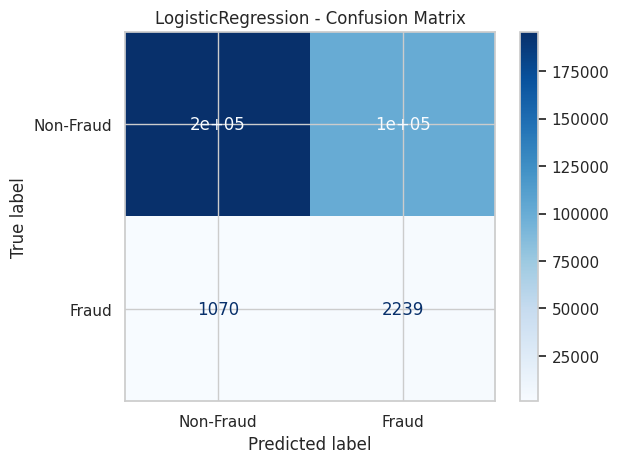

Confusion Matrix for Randomforest:
Model Randomforest saved successfully.


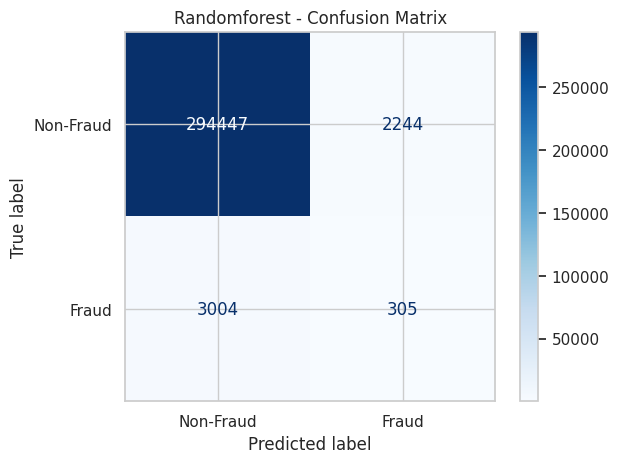

Confusion Matrix for xgboost:
Model xgboost saved successfully.


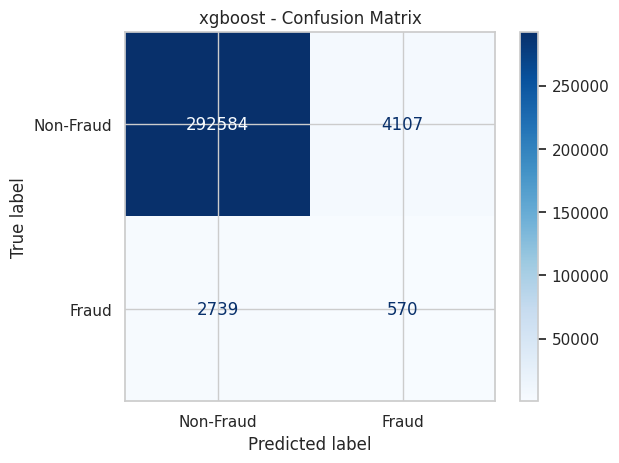

In [57]:
import joblib

# First, make sure to install joblib
!pip install joblib

# After training each model
for model_name, model in models.items():
    print(f"Confusion Matrix for {model_name}:")

    # Fit the model
    model.fit(X_train_smote, y_train_smote)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Save the trained model
    joblib.dump(model, f'{model_name}_fraud_detection_model.joblib')
    print(f"Model {model_name} saved successfully.")

    # Display the confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Non-Fraud', 'Fraud'], cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

In [60]:
import joblib
import numpy as np
import pandas as pd

# Function to generate synthetic test data
def generate_synthetic_test_data(num_samples=10):
    """
    Generate synthetic test data mimicking the original dataset structure
    """
    # Get the column names from X_train_smote (excluding the target variable)
    columns = X_train_smote.columns.tolist()

    # Create synthetic data with random values
    synthetic_data = pd.DataFrame(np.random.rand(num_samples, len(columns)), columns=columns)

    # Adjust some columns to be more realistic
    # Income group (categorical: 1, 2, or 3)
    synthetic_data['income_group'] = np.random.choice([1, 2, 3], num_samples)

    # Name email similarity group (categorical: 1, 2, or 3)
    synthetic_data['name_email_similarity_group'] = np.random.choice([1, 2, 3], num_samples)

    # Credit risk score (categorical: 1, 2, 3, 4, or 5)
    synthetic_data['credit_risk_score'] = np.random.choice([1, 2, 3, 4, 5], num_samples)

    # Customer age (more realistic range)
    synthetic_data['customer_age'] = np.random.randint(18, 65, num_samples)

    return synthetic_data

# Generate synthetic test data
test_data = generate_synthetic_test_data(10)

# Load saved models
models = {
    'LogisticRegression': joblib.load('LogisticRegression_fraud_detection_model.joblib'),
    'RandomForest': joblib.load('Randomforest_fraud_detection_model.joblib'),
    'XGBoost': joblib.load('xgboost_fraud_detection_model.joblib')
}

# Prediction function
def predict_fraud(test_data, models):
    """
    Predict fraud for test data using multiple models
    """
    results = {}

    for model_name, model in models.items():
        # Predict fraud probabilities
        pred_proba = model.predict_proba(test_data)[:, 1]
        pred_label = model.predict(test_data)

        results[model_name] = {
            'Fraud Probabilities': pred_proba.tolist(),
            'Fraud Predictions': pred_label.tolist()
        }

    return results

# Run predictions
prediction_results = predict_fraud(test_data, models)

# Display results
for model_name, results in prediction_results.items():
    print(f"Results for {model_name}:")
    print(f"Fraud Probabilities: {results['Fraud Probabilities']}")
    print(f"Fraud Predictions: {results['Fraud Predictions']}")
    print("-" * 40)

Results for LogisticRegression:
Fraud Probabilities: [0.638884128974234, 0.6581075115033792, 0.8730971108305536, 0.6822117417214923, 0.6720400997278242, 0.7277552237195836, 0.6776728818055748, 0.7175001891580847, 0.8624757282130948, 0.7409867351375095]
Fraud Predictions: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
----------------------------------------
Results for RandomForest:
Fraud Probabilities: [0.13, 0.07, 0.1, 0.19, 0.25, 0.16, 0.2, 0.17, 0.09, 0.2]
Fraud Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
----------------------------------------
Results for XGBoost:
Fraud Probabilities: [0.9984549283981323, 0.9718090295791626, 0.9999067783355713, 0.9998971223831177, 0.9997628331184387, 0.9997807145118713, 0.9995299577713013, 0.9996402263641357, 0.9997021555900574, 0.9996775388717651]
Fraud Predictions: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
----------------------------------------


In [61]:
import joblib
import xgboost as xgb

# Load the model using joblib or pickle
model = joblib.load('/content/xgboost_fraud_detection_model.joblib')

# Save it again in the new format
model.get_booster().save_model('xgboost_fraud_detection_model.model')

In [62]:
import xgboost as xgb

# Load the model
model = xgb.Booster()
model.load_model('xgboost_fraud_detection_model.model')

# Check feature names
feature_names = model.feature_names
print(feature_names)

['income_group', 'name_email_similarity_group', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'housing_status_BF', 'housing_status_BG', 'source_TELEAPP', 'device_os_macintosh', 'device_os_other', 'device_os_windows', 'de

In [2]:
import xgboost as xgb

# Load the model (replace with your actual model file path)
model_path = './xgboost_fraud_detection_model.model'
model = xgb.Booster()
model.load_model(model_path)

# Display feature names and other metadata if available
try:
    print("Model Feature Names:")
    print(model.feature_names)  # This will work if the model was trained with feature names
except AttributeError:
    print("Feature names are not stored in the model.")

# If feature names are unavailable, create a dummy DMatrix and see what happens
import numpy as np

try:
    print("Testing input structure...")
    dummy_input = np.random.rand(1, model.num_feature())  # Attempt to infer the number of features
    dmatrix = xgb.DMatrix(dummy_input)
    prediction = model.predict(dmatrix)
    print(f"Prediction test successful! Number of features: {model.num_feature()}")
    print(f"Example prediction: {prediction}")
except Exception as e:
    print("Error during prediction test:")
    print(str(e))

Model Feature Names:
['income_group', 'name_email_similarity_group', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'housing_status_BF', 'housing_status_BG', 'source_TELEAPP', 'device_os_macintosh', 'device_os_other', 'de